In [1]:
import pandas as pd

In [2]:
# tofdrug_sample100.csv 파일 읽기
df = pd.read_csv('tofdrug.csv', encoding='ISO-8859-1')

# drug_concept_id 및 source_name 컬럼에 따른 처방 통계 계산
prescription_stats = df.groupby(['drug_concept_id', 'source_name', 'atc_cd']).size().reset_index(name='count')

# 처방받은 횟수에 따라 내림차순으로 정렬
prescription_stats_sorted = prescription_stats.sort_values(by='count', ascending=False)

prescription_stats_sorted.head(10)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24156\1139077161.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tofdrug.csv', encoding='ISO-8859-1')


,drug_concept_id,source_name,atc_cd,count
421,19079658,Spironolactone 25mg tab,C03DA01,28710
82,957136,Furosemide 40mg tab,C03CA01,28287
587,21138024,Salbutamol 2.5mg nebule inhaler,R03AC02,26708
789,40165789,Enalapril 5mg tab,C09AA02,23732
696,36249739,Dextrose 5% 50ml btl,B05BA03,20804
1320,43296872,Acetylcysteine 20% 4ml inhaler,R05CB01,19925
846,40221384,Normal saline 0.9% 50ml btl,B05XA03,17824
203,1718698,Potassium chloride 40mEq/20ml inj,B05XA01,15554
429,19088169,Ambroxol 3mg/ml syrup,R05CB06,14800
112,1113143,Aspirin 100mg tab,N02BA01,13536


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24156\1411895574.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="count", y="source_name", data=top_prescriptions, palette="coolwarm")


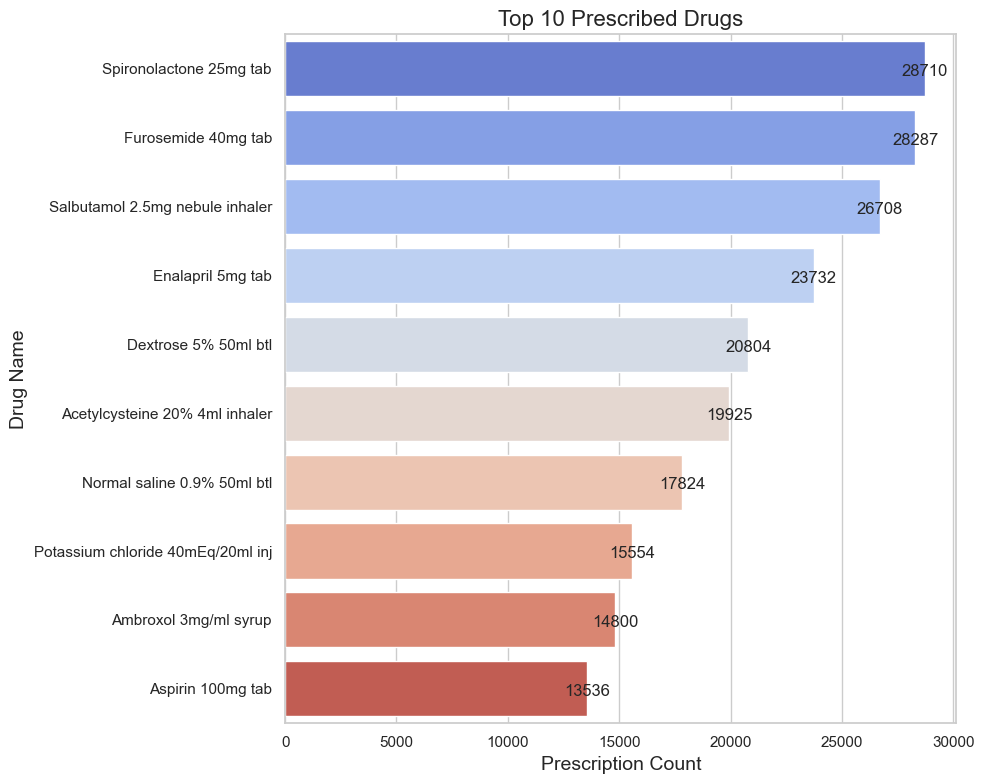

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 데이터 준비
top_prescriptions = prescription_stats_sorted.head(10)

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# 수평 막대 그래프 생성
ax = sns.barplot(x="count", y="source_name", data=top_prescriptions, palette="coolwarm")

# 제목 및 라벨 설정
ax.set_title('Top 10 Prescribed Drugs', fontsize=16)
ax.set_xlabel('Prescription Count', fontsize=14)
ax.set_ylabel('Drug Name', fontsize=14)

# 값을 막대 위에 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.tight_layout()
plt.show()


In [4]:
import re

# 먼저, 약물 이름을 단순화하기 전에 source_name과 atc_cd 간의 매핑을 생성합니다.
source_atc_mapping = df[['source_name', 'atc_cd']].drop_duplicates()

# 약물 이름에서 용량과 관련된 정보를 제거하는 함수
def simplify_drug_name(name):
    # 용량, 용기, 제형 등을 제거
    simplified_name = re.sub(r'\s+\d*\.?\d*\s*(mg|ml|mEq|g|%|L)(/\d*\.?\d*\s*(mg|ml|mEq|g|%|L))?|\s+tab|\s+btl|\s+inj|\s+nebule|\s+bag', '', name, flags=re.I)
    return simplified_name.strip()

# 다음으로, df에 simplified_drug_name 컬럼을 추가합니다.
df['simplified_drug_name'] = df['source_name'].apply(simplify_drug_name)

# simplified_drug_name 기준으로 atc_cd를 매핑하기 위해, 먼저 source_name을 기준으로 atc_cd를 merge합니다.
df_atc = pd.merge(df, source_atc_mapping, on='source_name', how='left')

# 이제 simplified_drug_name 및 atc_cd에 따라 처방 통계를 계산합니다.
simplified_prescription_stats_with_atc = df_atc.groupby(['simplified_drug_name', 'atc_cd_y']).size().reset_index(name='count')

# 처방받은 횟수에 따라 내림차순으로 정렬
simplified_prescription_stats_with_atc_sorted = simplified_prescription_stats_with_atc.sort_values(by='count', ascending=False)

# 상위 10개 결과 출력을 시도합니다.
simplified_prescription_stats_with_atc_sorted.head(10)


,simplified_drug_name,atc_cd_y,count
311,Dextrose,B05BA03,50021
453,Furosemide,C03CA01,40818
753,Normal saline,B05XA03,36598
970,Spironolactone,C03DA01,28710
933,Salbutamol inhaler,R03AC02,26708
358,Enalapril,C09AA02,23934
15,Acetylcysteine inhaler,R05CB01,19925
393,Famotidine,A02BA03,16959
840,Potassium chloride,B05XA01,15554
53,Ambroxol syrup,R05CB06,14800


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24156\4083467876.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="count", y="simplified_drug_name", data=top_simplified_prescriptions, palette="coolwarm")


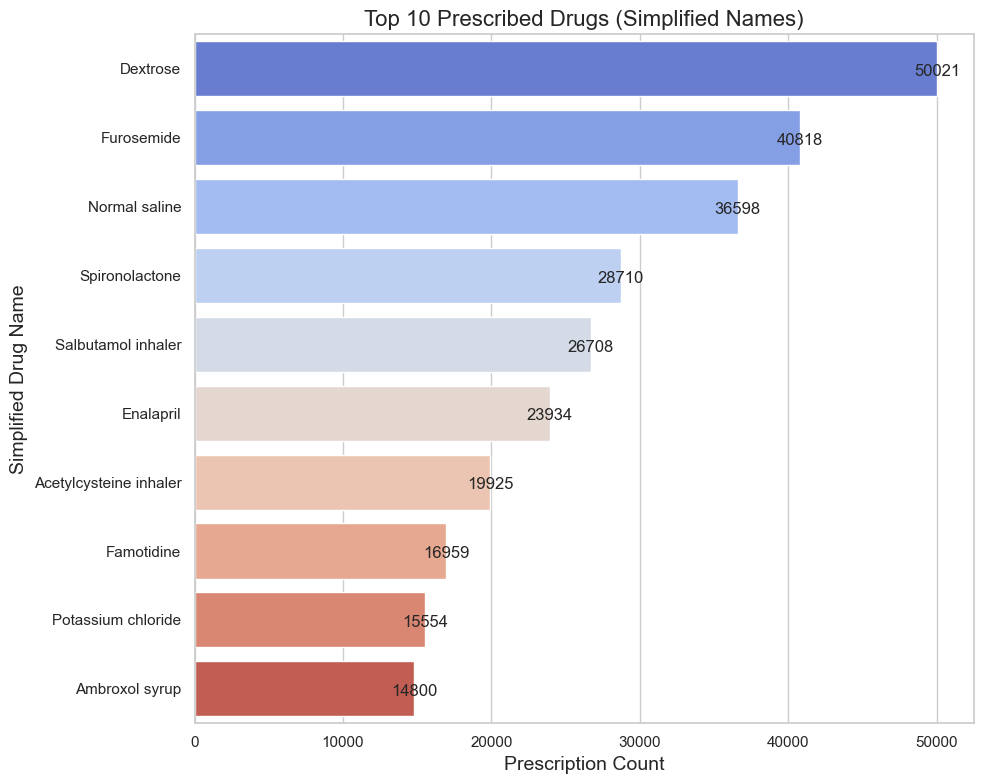

In [5]:
# 시각화를 위한 데이터 준비
top_simplified_prescriptions = simplified_prescription_stats_with_atc_sorted.head(10)

# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 수평 막대 그래프 생성
ax = sns.barplot(x="count", y="simplified_drug_name", data=top_simplified_prescriptions, palette="coolwarm")

# 제목 및 라벨 설정
ax.set_title('Top 10 Prescribed Drugs (Simplified Names)', fontsize=16)
ax.set_xlabel('Prescription Count', fontsize=14)
ax.set_ylabel('Simplified Drug Name', fontsize=14)

# 값을 막대 위에 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.tight_layout()
plt.show()
